In [1]:
from pymonntorch import *
import torch

import matplotlib.pyplot as plt
from simulate import Simulation
from models.activity import ActivityRecorder
from models.dendrites import Dendrite
from models.currents import ConstantCurrent, NoisyCurrent, SetCurrent, CurrentSum, StepCurrent, RandomCurrent
from models.neurons import LIF
from models.synapses import SimpleSynapse, FullyConnectedSynapse, RandomConnectedFixedProbSynapse, \
    RandomConnectedFixedInputSynapse
from models.time_res import TimeResolution

# Random coupling: Fixed number of presynaptic partners

In [2]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}))
ng_exc1 =  sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(),
        2: StepCurrent(offset=5,
                       value=1,
                       noise_range=2,
                       t_start=500),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)
ng_exc2 =  sim.add_neuron_group(
    tag="ng_exc2",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=5,
                           noise_range=2),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc2_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc2_event")
    }
)
ng_inh = sim.add_neuron_group(
    tag="ng_inh",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=0),
        6: Dendrite(),
        7: LIF(
            tau=3,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=10,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_inh_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inh_event")
    }
)
# Synapse for inside connection of NG_EXC_1
syn_exc_1 = sim.add_synapse_group(
                   tag="exc1-exc1",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=7, n=20, variance=0.75)})

# Synapse for inside connection of NG_EXC_2
syn_exc_2 = sim.add_synapse_group(
                   tag="exc2-exc2",
                   src=ng_exc2,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=7, n=20, variance=0.75)})

# Synapse for inside connection of NG_INH
# syn_inh = net.add_synapse_group(
#                    tag="inh-inh",
#                    src=ng_inh,
#                    dst=ng_inh,
#                    behavior={4: RandomConnectedFixedInputSynapse(j0=-100, n=50, variance=0.45, alpha=0.9)})

# # Synapse for connection from NG_EXC_1 to NG_INH
syn_exc_1_inh = sim.add_synapse_group(
                   tag="exc1-inh",
                   src=ng_exc1,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=15, n=20, variance=0.75),
                             9: Recorder(variables=["I"], tag="exc1-inh_rec")})

# # Synapse for connection from to NG_INH to NG_EXC_1
syn_inh_exc_1 = sim.add_synapse_group(
                   tag="inh-exc1",
                   src=ng_inh,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-12, n=12, variance=0.75)})

# # Synapse for connection from NG_EXC_2 to NG_INH
syn_exc_2_inh = sim.add_synapse_group(
                   tag="exc2-inh",
                   src=ng_exc2,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=15, n=20, variance=0.75)})
# # Synapse for connection from to NG_INH to NG_EXC_2
syn_inh_exc_2 = sim.add_synapse_group(
                   tag="inh-exc2",
                   src=ng_inh,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-12, n=12, variance=0.75)})

sim.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(300)|3 groups, Synapses: tensor(60000)|6 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:StepCurrent(offset=5,value=1,noise_range=2,t_start=500,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
NeuronGroup['ng_exc2', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:ConstantCurrent(value=5,noise_range=2,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc2_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=T

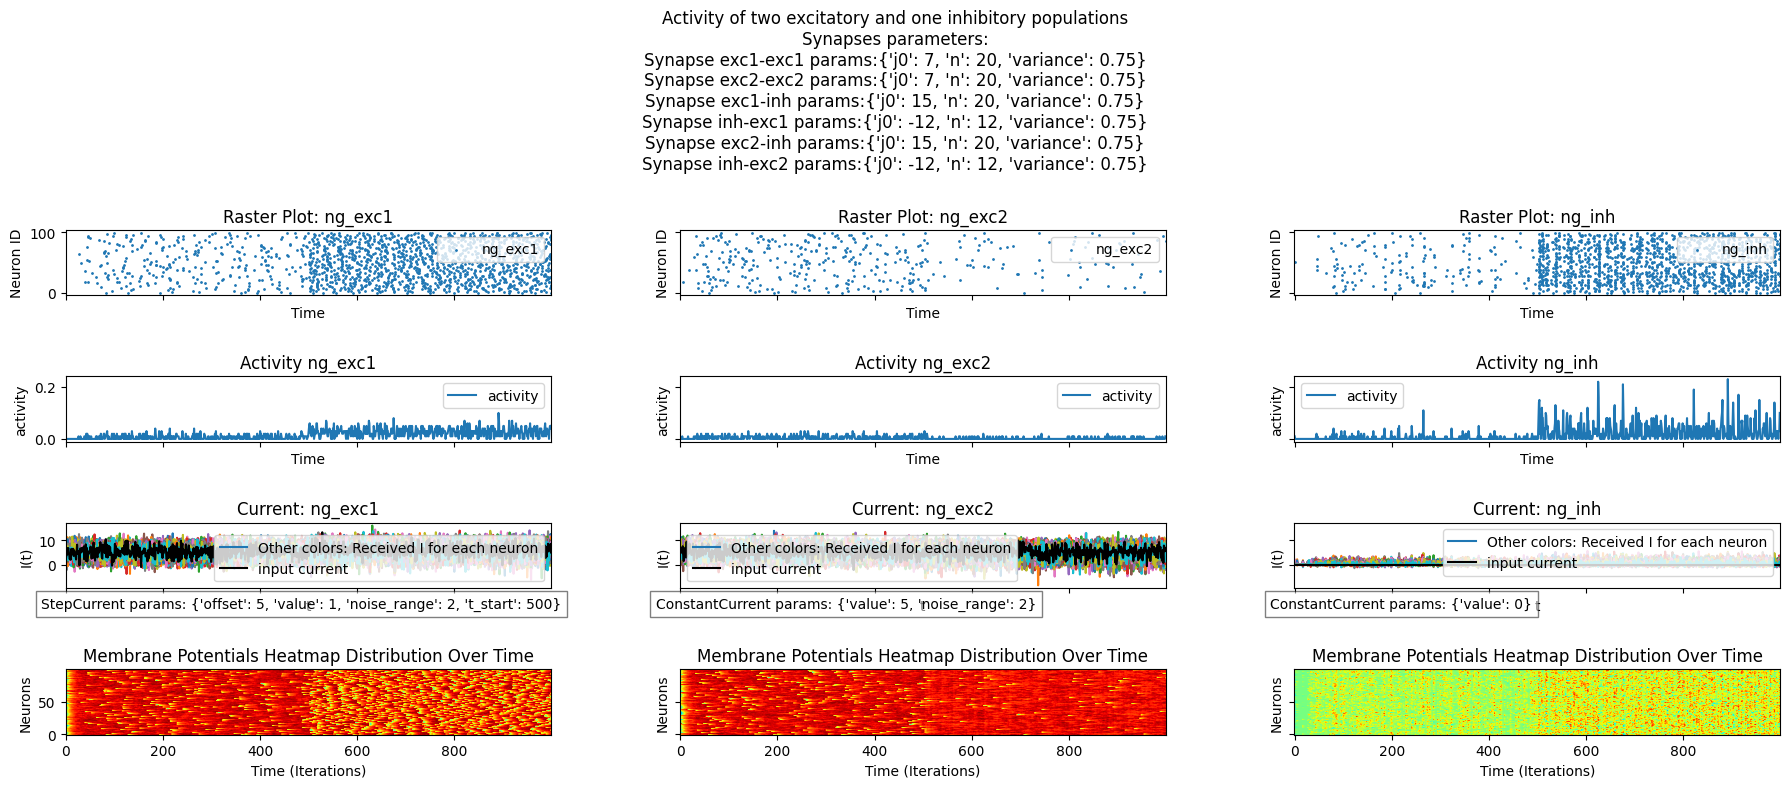

In [3]:
fig, axs = plt.subplots(4, 3, figsize=(18, 8), sharex=True, sharey='row')
ng_exc1.add_raster_plot(axs[0, 0], s=1)
ng_exc2.add_raster_plot(axs[0, 1], s=1)
ng_inh.add_raster_plot(axs[0, 2], s=1)

ng_exc1.add_activity_plot(axs[1, 0])
ng_exc2.add_activity_plot(axs[1, 1])
ng_inh.add_activity_plot(axs[1, 2])

ng_exc1.add_current_plot(axs[2, 0])
ng_exc1.add_current_params_info(axs[2, 0], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_exc2.add_current_plot(axs[2, 1])
ng_exc2.add_current_params_info(axs[2, 1], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_inh.add_current_plot(axs[2, 2])
ng_inh.add_current_params_info(axs[2, 2], text_x=-0.05, text_y=-0.3, current_idx=2)

ng_exc1.add_membrane_potential_distribution(axs[3, 0])
ng_exc2.add_membrane_potential_distribution(axs[3, 1])
ng_inh.add_membrane_potential_distribution(axs[3, 2])
# sim.add_synapses_params_info(axs[2, 1], text_y=-0.5, synapse_idx=4)
fig.suptitle("Activity of two excitatory and one inhibitory populations\n" + sim.get_synapses_params_info())
plt.tight_layout()
plt.savefig("report/plots/part4-fixed-synapse-bonus.pdf")
plt.show()

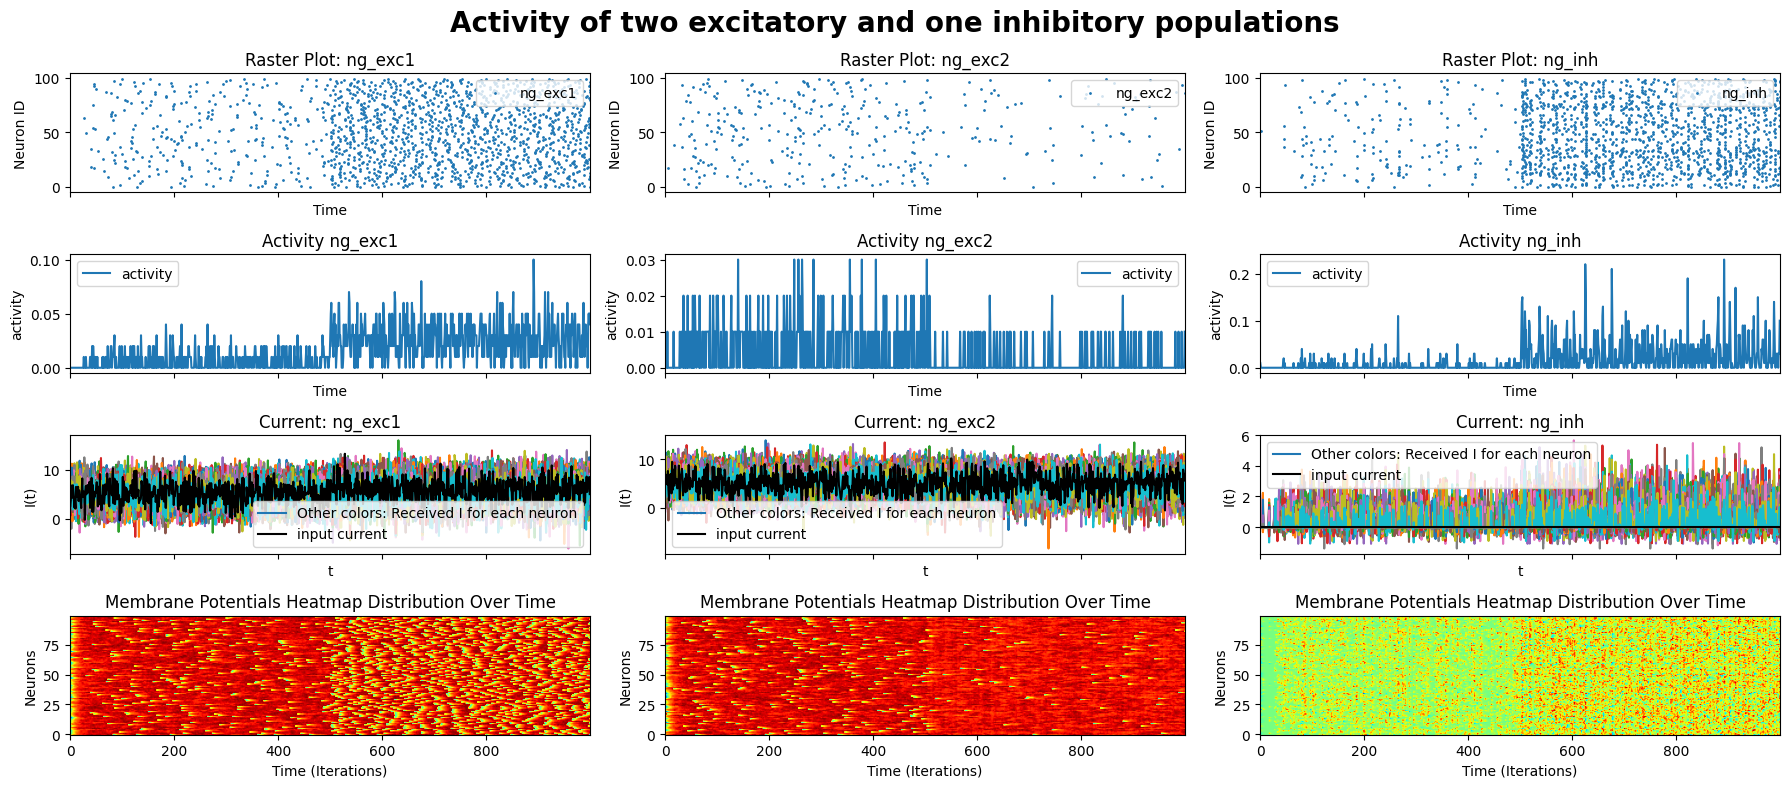

In [4]:
fig, axs = plt.subplots(4, 3, figsize=(18, 8), sharex=True)
ng_exc1.add_raster_plot(axs[0, 0], s=1)
ng_exc2.add_raster_plot(axs[0, 1], s=1)
ng_inh.add_raster_plot(axs[0, 2], s=1)

ng_exc1.add_activity_plot(axs[1, 0])
ng_exc2.add_activity_plot(axs[1, 1])
ng_inh.add_activity_plot(axs[1, 2])

ng_exc1.add_current_plot(axs[2, 0])
ng_exc2.add_current_plot(axs[2, 1])
ng_inh.add_current_plot(axs[2, 2])

ng_exc1.add_membrane_potential_distribution(axs[3, 0])
ng_exc2.add_membrane_potential_distribution(axs[3, 1])
ng_inh.add_membrane_potential_distribution(axs[3, 2])

fig.suptitle("Activity of two excitatory and one inhibitory populations", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()